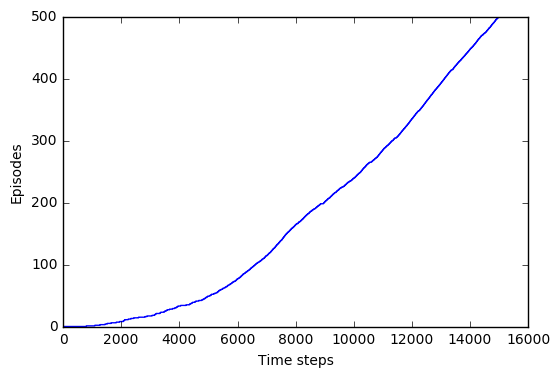

['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'R', 'R', 'R', 'R', 'R', 'D', 'R', 'D']
['R', 'R', 'U', 'R', 'R', 'R', 'R', 'D', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'D', 'D']
['D', 'R', 'L', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
['D', 'R', 'R', 'D', 'R', 'U', 'U', 'D', 'L', 'L']
['L', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# world height
WORLD_HEIGHT = 7

# world width
WORLD_WIDTH = 10

# wind strength for each column
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# possible actions
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# episilon exploration for e-greedy
EPSILON = 0.1

# step size
STEP = 0.5

# reward for each step
REWARD = -1.0

# Q values are initialized to zero
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
# start and termination as laid out in the textbook
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# set up destinations for each action in each state
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# play for an episode
def oneEpisode():
    # track the total time steps in this episode
    time = 0

    # initialize state
    currentState = startState

    # choose an action based on epsilon-greedy algorithm
    if np.random.binomial(1, EPSILON) == 1:
        # getting random value in the 0.1 condition
        currentAction = np.random.choice(actions)
    else:
        # executing greedy option in all other cases
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # keep going until get to the goal state
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa update as per Equation 6.7
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            STEP * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# play for 500 episodes to make sure to get a more converged policy
# episodeLimit = 200

# figure 6.4
episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure()
plt.plot(episodes)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# display the optimal policy
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])